In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [1]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
 dataset = tf.keras.preprocessing.image_dataset_from_directory(
     "E:\Python\Scripts\Practice\PlantVillage",
     shuffle = True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
 )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[192. 191. 199.]
  [189. 188. 196.]
  [185. 184. 192.]
  ...
  [177. 175. 186.]
  [176. 174. 185.]
  [176. 174. 185.]]

 [[193. 192. 200.]
  [188. 187. 195.]
  [184. 183. 191.]
  ...
  [181. 179. 190.]
  [179. 177. 188.]
  [179. 177. 188.]]

 [[192. 191. 199.]
  [189. 188. 196.]
  [186. 185. 193.]
  ...
  [183. 181. 192.]
  [182. 180. 191.]
  [182. 180. 191.]]

 ...

 [[168. 165. 172.]
  [172. 169. 176.]
  [168. 165. 172.]
  ...
  [153. 150. 161.]
  [151. 147. 161.]
  [141. 137. 151.]]

 [[165. 162. 169.]
  [166. 163. 170.]
  [155. 152. 159.]
  ...
  [152. 149. 160.]
  [144. 140. 154.]
  [143. 139. 153.]]

 [[166. 163. 170.]
  [174. 171. 178.]
  [165. 162. 169.]
  ...
  [158. 155. 166.]
  [149. 145. 159.]
  [154. 150. 164.]]], shape=(256, 256, 3), dtype=float32)


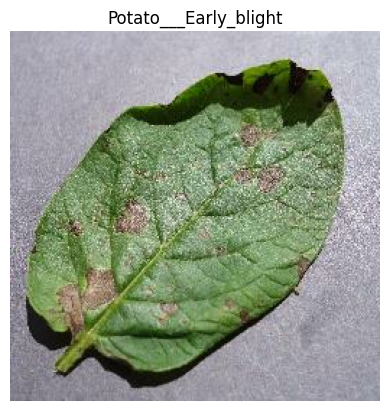

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

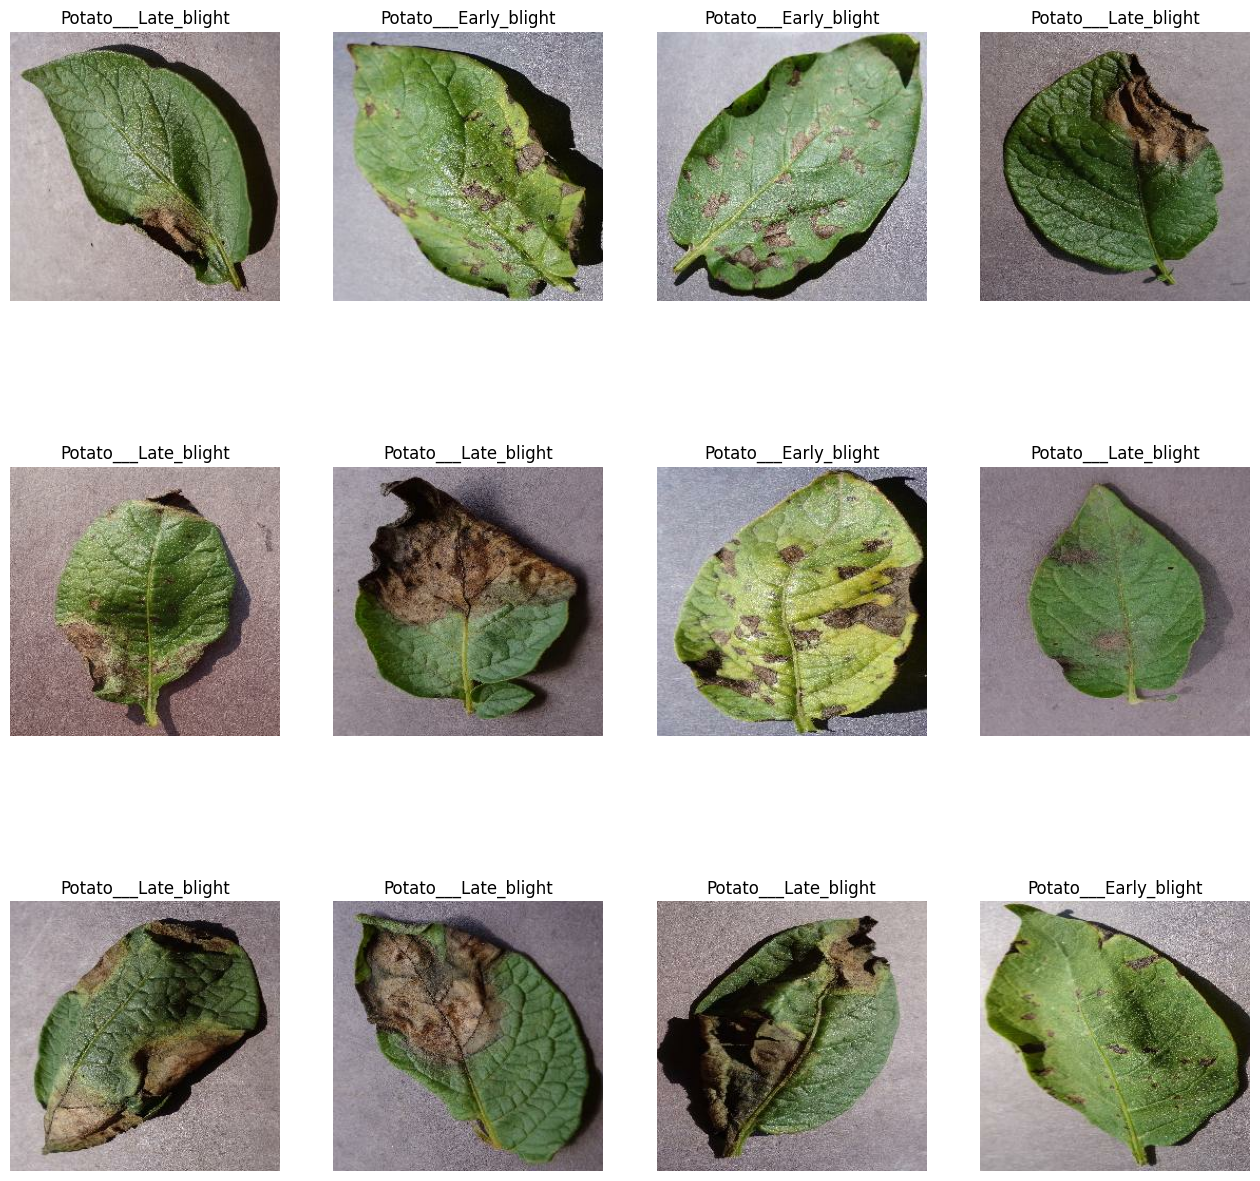

In [9]:
plt.figure(figsize=(16,16))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(985)
len(train_ds)

68

In [11]:
test_ds = dataset.skip(985)
len(test_ds)

0

In [12]:
val_data = 0.1
len(dataset)*val_data

6.800000000000001

In [13]:
val_ds = test_ds.take((123))
len(val_ds)

0

In [14]:
test_ds = test_ds.skip(123)
len(test_ds)

0

In [10]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split = 0.1,test_split = 0.1, shuffle=True,shuffle_size=10000):
    ds_size = len(dataset)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
        train_size = int(train_split * ds_size)
        val_size = int (val_split * ds_size)
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(train_ds)

54

In [13]:
len(val_ds)

6

In [14]:
len(test_ds)

8

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
])
model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [20]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
model1 = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/20
54/54 [==============================] - 96s 2s/step - loss: 0.8944 - accuracy: 0.5463 - val_loss: 0.8615 - val_accuracy: 0.6302
Epoch 2/20
54/54 [==============================] - 97s 2s/step - loss: 0.6132 - accuracy: 0.7303 - val_loss: 0.3540 - val_accuracy: 0.9010
Epoch 3/20
54/54 [==============================] - 99s 2s/step - loss: 0.3493 - accuracy: 0.8582 - val_loss: 0.4115 - val_accuracy: 0.8594
Epoch 4/20
54/54 [==============================] - 100s 2s/step - loss: 0.3723 - accuracy: 0.8501 - val_loss: 0.2152 - val_accuracy: 0.9167
Epoch 5/20
54/54 [==============================] - 102s 2s/step - loss: 0.2921 - accuracy: 0.8808 - val_loss: 0.2582 - val_accuracy: 0.9115
Epoch 6/20
54/54 [==============================] - 101s 2s/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.1669 - val_accuracy: 0.9427
Epoch 7/20
54/54 [==============================] - 101s 2s/step - loss: 0.1960 - accuracy: 0.9120 - val_loss: 0.1476 - val_accuracy: 0.9375
Epoch 8/20
54/54

In [22]:
test_acc = model.evaluate(test_ds)

8/8 [==============================] - 4s 315ms/step - loss: 0.0573 - accuracy: 0.9805


In [23]:
test_acc

[0.05725209414958954, 0.98046875]

In [24]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']
loss = model1.history['loss']
val_loss = model1.history['val_loss']

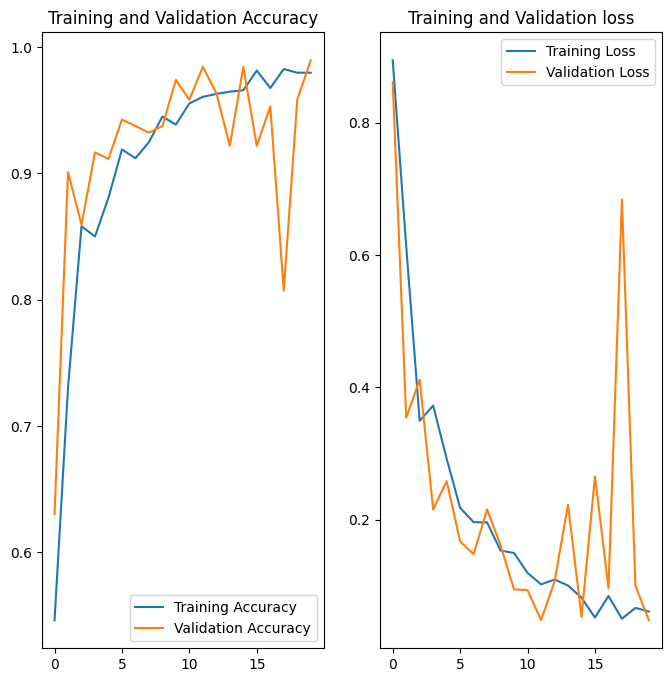

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label= 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label= 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 619ms/step
predicted label: Potato___Early_blight


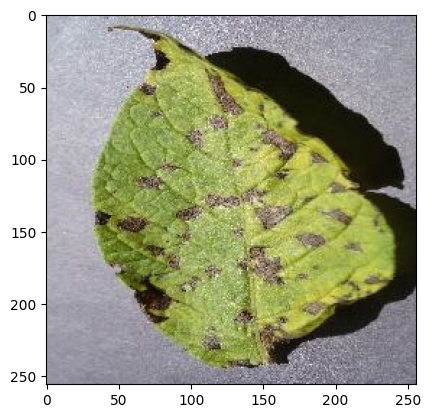

In [28]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [33]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


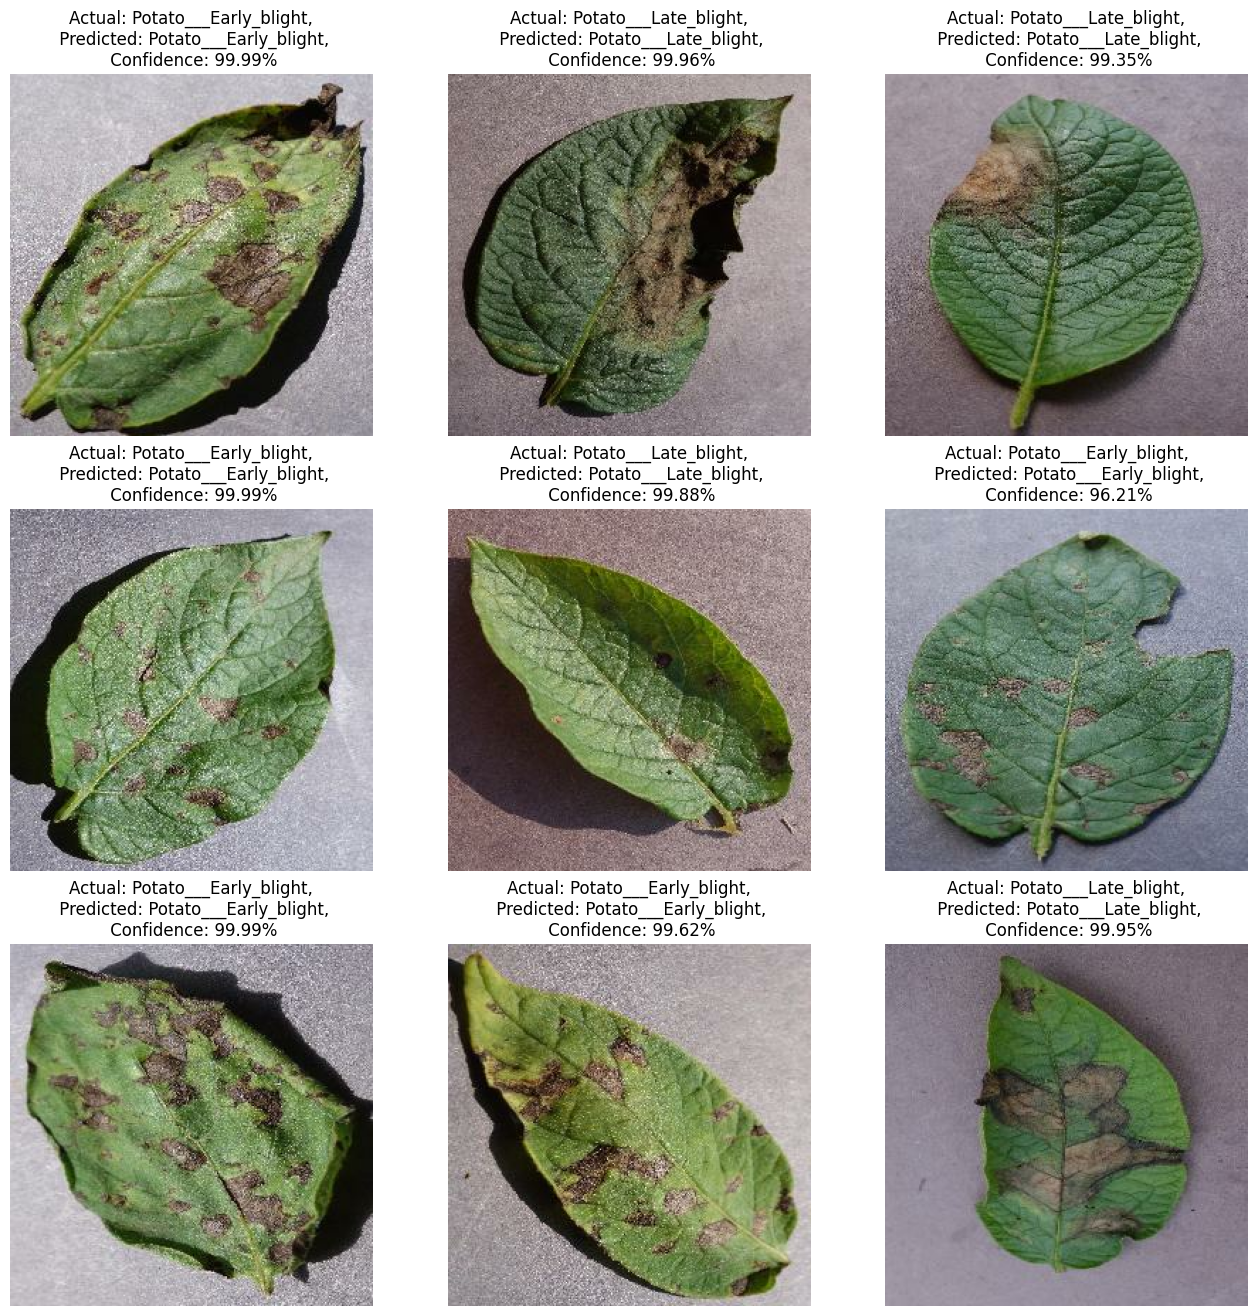

In [34]:
plt.figure(figsize=(16,16))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")

In [49]:
model_version=1
model.save(f".../Models/{model_version}")

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects